# Introduction

<font size="4">Hey!<br> 
&emsp;&emsp;It was a quite easy competition, in which I have got into the top 12%. My working device is a simple laptop with an AMD GPU. I've found out, that many popular AutoML libraries are incompatible with this type of GPU. Also, I am sure, that my results could be better with different GPU. Of course, I've tried some feature engineering, but it didn't increase my final score. It's quite possible, that I've missed something. Anyway, we will see the best solutions after deadline) <br>
&emsp;&emsp; I feel myself necessary to give some explanations of my approach to this competition. I will split this paragraph into several points: <br>
● **Feature engineering:** <br> &emsp;&emsp;
    Firstly, I've analysed the labels and have found, that there are some incorrect labels in the dataset. Their replacement didn't give any improvement. Then I used "secondary-mushroom-dataset-data-set", which was available in the every discussion. My next idea was to erase labels with excessive amount of NULL-values. Each of this method didn't help me a lot.<br>
● **AutoML libraries:** <br> &emsp;&emsp;
    Before AutoGluon, I've used LightAutoML (by Sber AI). Honestly, Autogluon is the way better and has much more convenient features.<br>
● **Small amount of analysis:** <br> &emsp;&emsp;
    In my final version, I have left only feature importance plot after prediction. This is due to the huge execution time on my laptop. I preferred to focus on training the model.<br> <br> <br>&emsp;&emsp;
    Thanks for reading, it was cool to take part in such competition!
</font> 

# Required libraries, etc.


In [1]:
!pip install ray==2.10.0
!pip install autogluon.tabular
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.9.0
    Uninstalling ray-2.9.0:
      Successfully uninstalled ray-2.9.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.131
    Uninstalling botocore-1.34.131:
      Succe

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor #AutoML library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Loading Data

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/secondary-mushroom-dataset-data-set/MushroomDataset/primary_data_meta.txt
/kaggle/input/secondary-mushroom-dataset-data-set/MushroomDataset/secondary_data_meta.txt
/kaggle/input/secondary-mushroom-dataset-data-set/MushroomDataset/primary_data.csv
/kaggle/input/secondary-mushroom-dataset-data-set/MushroomDataset/secondary_data.csv
/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [4]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
train_data = train_data.drop('id', axis = 1)
print(f"Train shape: {train_data.shape}")
train_data.head()

Train shape: (3116945, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
test_data = test_data.drop('id', axis = 1)
print(f"Test shape: {train_data.shape}")
test_data.head()

Test shape: (3116945, 21)


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [6]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
print(sub.shape)
sub.head()

(2077964, 2)


,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


# Creating a model

In [7]:
N_HOURS = 9
label = 'class'
predictor = TabularPredictor(label=label,eval_metric ='mcc',
                            problem_type="binary").fit(train_data,presets='best_quality',
                                                                    time_limit=3600*N_HOURS,verbosity=3,
                                                       excluded_model_types=['KNN'],
                                                       ag_args_fit={'num_gpus' : 1}
                                                      )

No path specified. Models will be saved in: "AutogluonModels/ag-20240826_063120"
Verbosity: 3 (Detailed Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Jun 27 20:43:36 UTC 2024
CPU Count:          4
GPU Count:          2
Memory Avail:       28.99 GB / 31.36 GB (92.5%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 1},
 'auto_stack': True,
 'excluded_model_types': ['KNN'],
 'num_bag_sets': 1,
 'verbosity': 3}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus': 1},
 'auto_stack': True,
 'calibrate': 'auto',
 'ds_args': {'clean_up_fits': True,
             'detection_time_frac': 0.25,
             'enable_ray_logging'

(_ray_fit pid=591) [50]	valid_set's binary_logloss: 0.17587	valid_set's mcc: 0.95929
(_ray_fit pid=591) [100]	valid_set's binary_logloss: 0.0835773	valid_set's mcc: 0.974174 [repeated 2x across cluster]
(_ray_fit pid=591) [150]	valid_set's binary_logloss: 0.0558422	valid_set's mcc: 0.978535 [repeated 2x across cluster]
(_ray_fit pid=591) [200]	valid_set's binary_logloss: 0.0458349	valid_set's mcc: 0.980551 [repeated 2x across cluster]
(_ray_fit pid=591) [250]	valid_set's binary_logloss: 0.041895	valid_set's mcc: 0.981388 [repeated 2x across cluster]
(_ray_fit pid=591) [300]	valid_set's binary_logloss: 0.039814	valid_set's mcc: 0.982231 [repeated 2x across cluster]
(_ray_fit pid=591) [350]	valid_set's binary_logloss: 0.0385859	valid_set's mcc: 0.982924 [repeated 2x across cluster]
(_ray_fit pid=591) [400]	valid_set's binary_logloss: 0.0378836	valid_set's mcc: 0.983349 [repeated 2x across cluster]
(_ray_fit pid=591) [450]	valid_set's binary_logloss: 0.0374345	valid_set's mcc: 0.98364 [re

(_ray_fit pid=591) 	Ran out of time, early stopping on iteration 3178. Best iteration is:
(_ray_fit pid=591) 	[3177]	valid_set's binary_logloss: 0.0353888	valid_set's mcc: 0.984927
(_ray_fit pid=590) 1 warning generated. [repeated 9x across cluster]
(_ray_fit pid=665) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=590) 	Ran out of time, early stopping on iteration 3165. Best iteration is:
(_ray_fit pid=590) 	[3126]	valid_set's binary_logloss: 0.0359156	valid_set's mcc: 0.98457


(_ray_fit pid=665) [50]	valid_set's binary_logloss: 0.175731	valid_set's mcc: 0.96049 [repeated 2x across cluster]
(_ray_fit pid=665) [100]	valid_set's binary_logloss: 0.0838414	valid_set's mcc: 0.974362 [repeated 2x across cluster]
(_ray_fit pid=665) [150]	valid_set's binary_logloss: 0.0566452	valid_set's mcc: 0.978058 [repeated 2x across cluster]
(_ray_fit pid=665) [200]	valid_set's binary_logloss: 0.0466406	valid_set's mcc: 0.980386 [repeated 2x across cluster]
(_ray_fit pid=665) [250]	valid_set's binary_logloss: 0.0421078	valid_set's mcc: 0.981787 [repeated 2x across cluster]
(_ray_fit pid=665) [300]	valid_set's binary_logloss: 0.0398941	valid_set's mcc: 0.982765 [repeated 2x across cluster]
(_ray_fit pid=665) [350]	valid_set's binary_logloss: 0.0387976	valid_set's mcc: 0.983207 [repeated 2x across cluster]
(_ray_fit pid=665) [400]	valid_set's binary_logloss: 0.0381939	valid_set's mcc: 0.983452 [repeated 2x across cluster]
(_ray_fit pid=665) [450]	valid_set's binary_logloss: 0.0377

(_ray_fit pid=665) 	Ran out of time, early stopping on iteration 3227. Best iteration is:
(_ray_fit pid=665) 	[2795]	valid_set's binary_logloss: 0.0357331	valid_set's mcc: 0.984902
(_ray_fit pid=699) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=747) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=699) 	Ran out of time, early stopping on iteration 3211. Best iteration is:
(_ray_fit pid=699) 	[2897]	valid_set's binary_logloss: 0.0358952	valid_set's mcc: 0.984646
(_ray_fit pid=782) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=747) [50]	valid_set's binary_logloss: 0.180759	valid_set's mcc: 0.954526
(_ray_fit pid=782) [50]	valid_set's binary_logloss: 0.170836	valid_set's mcc: 0.961565
(_ray_fit pid=747) [100]	valid_set's binary_logloss: 0.087502	valid_set's mcc: 0.973625
(_ray_fit pid=782) [100]	valid_set's binary_logloss: 0.0790907	valid_set's mcc: 0.975316
(_ray_fit pid=747) [150]	valid_set's binary_logloss: 0.0564525	valid_set's mcc: 0.978008
(_ray_fit pid=782) [150]	valid_set's binary_logloss: 0.0541866	valid_set's mcc: 0.979311
(_ray_fit pid=747) [200]	valid_set's binary_logloss: 0.0460651	valid_set's mcc: 0.980062
(_ray_fit pid=782) [200]	valid_set's binary_logloss: 0.0450684	valid_set's mcc: 0.98073
(_ray_fit pid=747) [250]	valid_set's binary_logloss: 0.0423024	valid_set's mcc: 0.981236
(_ray_fit pid=782) [250]	valid_set's binary_logloss: 0.0412371	valid_set's mcc: 0.981882
(_ray_fit pid=747) [300]	valid_set's binary_logloss: 0.0405208	valid_set's mcc: 0.982045
(_ray_fit pid=782) [300]	va

(_ray_fit pid=747) 	Ran out of time, early stopping on iteration 3173. Best iteration is:
(_ray_fit pid=747) 	[3036]	valid_set's binary_logloss: 0.0364349	valid_set's mcc: 0.984302


(_ray_fit pid=782) [3150]	valid_set's binary_logloss: 0.0355603	valid_set's mcc: 0.984986


(_ray_fit pid=782) 	Ran out of time, early stopping on iteration 3162. Best iteration is:
(_ray_fit pid=782) 	[3059]	valid_set's binary_logloss: 0.035559	valid_set's mcc: 0.985027
(_ray_fit pid=829) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=829) [50]	valid_set's binary_logloss: 0.173223	valid_set's mcc: 0.956658
(_ray_fit pid=829) [100]	valid_set's binary_logloss: 0.0836922	valid_set's mcc: 0.973684 [repeated 2x across cluster]
(_ray_fit pid=829) [150]	valid_set's binary_logloss: 0.0567441	valid_set's mcc: 0.977725 [repeated 2x across cluster]
(_ray_fit pid=829) [200]	valid_set's binary_logloss: 0.0469994	valid_set's mcc: 0.979778 [repeated 2x across cluster]
(_ray_fit pid=829) [250]	valid_set's binary_logloss: 0.0429548	valid_set's mcc: 0.981007 [repeated 2x across cluster]
(_ray_fit pid=829) [300]	valid_set's binary_logloss: 0.0410914	valid_set's mcc: 0.981903 [repeated 2x across cluster]
(_ray_fit pid=829) [350]	valid_set's binary_logloss: 0.0399049	valid_set's mcc: 0.982491 [repeated 2x across cluster]
(_ray_fit pid=829) [400]	valid_set's binary_logloss: 0.0392374	valid_set's mcc: 0.98298 [repeated 2x across cluster]
(_ray_fit pid=829) [450]	valid_set's binary_logloss: 0.0388237	valid_set's mcc: 0.983248

(_ray_fit pid=829) 	Ran out of time, early stopping on iteration 3180. Best iteration is:
(_ray_fit pid=829) 	[3174]	valid_set's binary_logloss: 0.0368006	valid_set's mcc: 0.984571
(_ray_fit pid=863) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBMXT_BAG_L1/utils/oof.pkl
(_ray_fit pid=863) 	Ran out of time, early stopping on iteration 3199. Best iteration is:
(_ray_fit pid=863) 	[2952]	valid_set's binary_logloss: 0.0360596	valid_set's mcc: 0.984856
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBMXT_BAG_L1/model.pkl
(_dystack pid=189) 	0.9847	 = Validation score   (mcc)
(_dystack pid=189) 	4689.72s	 = Training   runtime
(_dystack pid=189) 	998.47s	 = Validation runtime
(_dystack pid=189) 	346.9	 = Inference  throughput (rows/s | 346328 batch size)
(_dystack pid=189) Saving AutogluonModels

(_ray_fit pid=1147) [50]	valid_set's binary_logloss: 0.144355	valid_set's mcc: 0.962598 [repeated 2x across cluster]
(_ray_fit pid=1147) [100]	valid_set's binary_logloss: 0.066459	valid_set's mcc: 0.975944 [repeated 2x across cluster]
(_ray_fit pid=1147) [150]	valid_set's binary_logloss: 0.0481628	valid_set's mcc: 0.979658 [repeated 2x across cluster]
(_ray_fit pid=1146) [200]	valid_set's binary_logloss: 0.0427622	valid_set's mcc: 0.981116 [repeated 2x across cluster]


(_ray_fit pid=1147) 	Ran out of time, early stopping on iteration 201. Best iteration is:
(_ray_fit pid=1147) 	[200]	valid_set's binary_logloss: 0.0424022	valid_set's mcc: 0.981148
(_ray_fit pid=1146) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1221) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1146) 	Ran out of time, early stopping on iteration 202. Best iteration is:
(_ray_fit pid=1146) 	[202]	valid_set's binary_logloss: 0.0426387	valid_set's mcc: 0.981209


(_ray_fit pid=1221) [50]	valid_set's binary_logloss: 0.145334	valid_set's mcc: 0.962139 [repeated 2x across cluster]
(_ray_fit pid=1221) [100]	valid_set's binary_logloss: 0.0660402	valid_set's mcc: 0.976473 [repeated 2x across cluster]
(_ray_fit pid=1221) [150]	valid_set's binary_logloss: 0.0485424	valid_set's mcc: 0.979837 [repeated 2x across cluster]
(_ray_fit pid=1221) [200]	valid_set's binary_logloss: 0.0426461	valid_set's mcc: 0.981413 [repeated 2x across cluster]


(_ray_fit pid=1221) 	Ran out of time, early stopping on iteration 202. Best iteration is:
(_ray_fit pid=1221) 	[202]	valid_set's binary_logloss: 0.0425057	valid_set's mcc: 0.981425
(_ray_fit pid=1254) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1305) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1254) 	Ran out of time, early stopping on iteration 197. Best iteration is:
(_ray_fit pid=1254) 	[197]	valid_set's binary_logloss: 0.0429022	valid_set's mcc: 0.981067


(_ray_fit pid=1305) [50]	valid_set's binary_logloss: 0.144049	valid_set's mcc: 0.964024
(_ray_fit pid=1338) [50]	valid_set's binary_logloss: 0.143358	valid_set's mcc: 0.963661
(_ray_fit pid=1305) [100]	valid_set's binary_logloss: 0.0670391	valid_set's mcc: 0.976384
(_ray_fit pid=1338) [100]	valid_set's binary_logloss: 0.0669141	valid_set's mcc: 0.977227
(_ray_fit pid=1305) [150]	valid_set's binary_logloss: 0.0487657	valid_set's mcc: 0.979436
(_ray_fit pid=1338) [150]	valid_set's binary_logloss: 0.0485308	valid_set's mcc: 0.979816


(_ray_fit pid=1305) 	Ran out of time, early stopping on iteration 197. Best iteration is:
(_ray_fit pid=1305) 	[197]	valid_set's binary_logloss: 0.043559	valid_set's mcc: 0.980682
(_ray_fit pid=1338) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1387) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1338) 	Ran out of time, early stopping on iteration 196. Best iteration is:
(_ray_fit pid=1338) 	[196]	valid_set's binary_logloss: 0.0430774	valid_set's mcc: 0.980934


(_ray_fit pid=1387) [50]	valid_set's binary_logloss: 0.144976	valid_set's mcc: 0.963257
(_ray_fit pid=1420) [50]	valid_set's binary_logloss: 0.143438	valid_set's mcc: 0.96594
(_ray_fit pid=1387) [100]	valid_set's binary_logloss: 0.0678279	valid_set's mcc: 0.976018
(_ray_fit pid=1420) [100]	valid_set's binary_logloss: 0.0659512	valid_set's mcc: 0.976224
(_ray_fit pid=1387) [150]	valid_set's binary_logloss: 0.0494179	valid_set's mcc: 0.97908
(_ray_fit pid=1420) [150]	valid_set's binary_logloss: 0.0483542	valid_set's mcc: 0.979919


(_ray_fit pid=1387) 	Ran out of time, early stopping on iteration 195. Best iteration is:
(_ray_fit pid=1387) 	[195]	valid_set's binary_logloss: 0.0438403	valid_set's mcc: 0.980441
(_ray_fit pid=1420) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBM_BAG_L1/utils/oof.pkl
(_ray_fit pid=1420) 	Ran out of time, early stopping on iteration 196. Best iteration is:
(_ray_fit pid=1420) 	[196]	valid_set's binary_logloss: 0.0428118	valid_set's mcc: 0.9812
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBM_BAG_L1/model.pkl
(_dystack pid=189) 	0.981	 = Validation score   (mcc)
(_dystack pid=189) 	474.61s	 = Training   runtime
(_dystack pid=189) 	66.57s	 = Validation runtime
(_dystack pid=189) 	5202.2	 = Inference  throughput (rows/s | 346328 batch size)
(_dystack pid=189) Saving AutogluonModels/ag-202

(_ray_fit pid=1719) 0:	learn: 0.6834341	test: 0.6834459	best: 0.6834459 (0)	total: 183ms	remaining: 183ms
(_ray_fit pid=1719) bestTest = 0.674769212
(_ray_fit pid=1719) bestIteration = 1


(_dystack pid=189) Failed to unpickle serialized exception
(_dystack pid=189) Traceback (most recent call last):
(_dystack pid=189)   File "/opt/conda/lib/python3.10/site-packages/ray/exceptions.py", line 46, in from_ray_exception
(_dystack pid=189)     return pickle.loads(ray_exception.serialized_exception)
(_dystack pid=189) ModuleNotFoundError: No module named '_catboost'
(_dystack pid=189) 
(_dystack pid=189) The above exception was the direct cause of the following exception:
(_dystack pid=189) 
(_dystack pid=189) Traceback (most recent call last):
(_dystack pid=189)   File "/opt/conda/lib/python3.10/site-packages/ray/_private/serialization.py", line 404, in deserialize_objects
(_dystack pid=189)     obj = self._deserialize_object(data, metadata, object_ref)
(_dystack pid=189)   File "/opt/conda/lib/python3.10/site-packages/ray/_private/serialization.py", line 293, in _deserialize_object
(_dystack pid=189)     return RayError.from_bytes(obj)
(_dystack pid=189)   File "/opt/conda/l

(_ray_fit pid=2031) [50]	valid_set's binary_logloss: 0.0827711	valid_set's mcc: 0.980732
(_ray_fit pid=1718) 1:	learn: 0.6756943	test: 0.6755210	best: 0.6755210 (1)	total: 226ms	remaining: 0us [repeated 3x across cluster]
(_ray_fit pid=1718) bestTest = 0.6755210198
(_ray_fit pid=1718) bestIteration = 1
(_ray_fit pid=2031) [100]	valid_set's binary_logloss: 0.0423063	valid_set's mcc: 0.98319 [repeated 2x across cluster]
(_ray_fit pid=2031) [150]	valid_set's binary_logloss: 0.0391317	valid_set's mcc: 0.983608 [repeated 2x across cluster]
(_ray_fit pid=2030) [200]	valid_set's binary_logloss: 0.0384314	valid_set's mcc: 0.983504 [repeated 2x across cluster]
(_ray_fit pid=2031) [250]	valid_set's binary_logloss: 0.037714	valid_set's mcc: 0.984033 [repeated 2x across cluster]
(_ray_fit pid=2031) [300]	valid_set's binary_logloss: 0.037438	valid_set's mcc: 0.984224 [repeated 2x across cluster]
(_ray_fit pid=2031) [350]	valid_set's binary_logloss: 0.0372565	valid_set's mcc: 0.984311 [repeated 2x a

(_ray_fit pid=2105) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training. [repeated 2x across cluster]


(_ray_fit pid=2030) [1050]	valid_set's binary_logloss: 0.0367836	valid_set's mcc: 0.98454
(_ray_fit pid=2105) [50]	valid_set's binary_logloss: 0.083614	valid_set's mcc: 0.980781
(_ray_fit pid=2030) [1100]	valid_set's binary_logloss: 0.036766	valid_set's mcc: 0.984575
(_ray_fit pid=2105) [100]	valid_set's binary_logloss: 0.0423655	valid_set's mcc: 0.983246
(_ray_fit pid=2030) [1150]	valid_set's binary_logloss: 0.0367521	valid_set's mcc: 0.984569
(_ray_fit pid=2030) [1200]	valid_set's binary_logloss: 0.0367411	valid_set's mcc: 0.984587
(_ray_fit pid=2105) [150]	valid_set's binary_logloss: 0.0387281	valid_set's mcc: 0.98374
(_ray_fit pid=2030) [1250]	valid_set's binary_logloss: 0.0367327	valid_set's mcc: 0.984581
(_ray_fit pid=2105) [200]	valid_set's binary_logloss: 0.0378909	valid_set's mcc: 0.983954
(_ray_fit pid=2030) [1300]	valid_set's binary_logloss: 0.036717	valid_set's mcc: 0.984622
(_ray_fit pid=2105) [250]	valid_set's binary_logloss: 0.0374194	valid_set's mcc: 0.984064
(_ray_fit 

(_ray_fit pid=2030) 	Ran out of time, early stopping on iteration 1519. Best iteration is:
(_ray_fit pid=2030) 	[1333]	valid_set's binary_logloss: 0.0367138	valid_set's mcc: 0.984645


(_ray_fit pid=2105) [400]	valid_set's binary_logloss: 0.0367095	valid_set's mcc: 0.984343
(_ray_fit pid=2105) [450]	valid_set's binary_logloss: 0.0365906	valid_set's mcc: 0.984384
(_ray_fit pid=2105) [500]	valid_set's binary_logloss: 0.0364881	valid_set's mcc: 0.984372
(_ray_fit pid=2105) [550]	valid_set's binary_logloss: 0.0363965	valid_set's mcc: 0.984453


(_ray_fit pid=2146) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2105) [600]	valid_set's binary_logloss: 0.0363305	valid_set's mcc: 0.984523
(_ray_fit pid=2146) [50]	valid_set's binary_logloss: 0.0833655	valid_set's mcc: 0.979659
(_ray_fit pid=2146) [100]	valid_set's binary_logloss: 0.0426041	valid_set's mcc: 0.982617 [repeated 2x across cluster]
(_ray_fit pid=2105) [750]	valid_set's binary_logloss: 0.0362308	valid_set's mcc: 0.984512 [repeated 2x across cluster]
(_ray_fit pid=2105) [800]	valid_set's binary_logloss: 0.0361999	valid_set's mcc: 0.984541 [repeated 2x across cluster]
(_ray_fit pid=2146) [200]	valid_set's binary_logloss: 0.0385899	valid_set's mcc: 0.983346
(_ray_fit pid=2105) [850]	valid_set's binary_logloss: 0.0361815	valid_set's mcc: 0.984547
(_ray_fit pid=2146) [250]	valid_set's binary_logloss: 0.038156	valid_set's mcc: 0.98355
(_ray_fit pid=2105) [900]	valid_set's binary_logloss: 0.0361672	valid_set's mcc: 0.984541
(_ray_fit pid=2146) [300]	valid_set's binary_logloss: 0.0379427	valid_set's mcc: 0.983632
(_ray_fit pid=21

(_ray_fit pid=2105) 	Ran out of time, early stopping on iteration 1487. Best iteration is:
(_ray_fit pid=2105) 	[1403]	valid_set's binary_logloss: 0.0360084	valid_set's mcc: 0.984686


(_ray_fit pid=2146) [850]	valid_set's binary_logloss: 0.0370564	valid_set's mcc: 0.984215
(_ray_fit pid=2146) [900]	valid_set's binary_logloss: 0.0370363	valid_set's mcc: 0.984239
(_ray_fit pid=2146) [950]	valid_set's binary_logloss: 0.0370045	valid_set's mcc: 0.984256
(_ray_fit pid=2146) [1000]	valid_set's binary_logloss: 0.0369865	valid_set's mcc: 0.984268


(_ray_fit pid=2187) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2146) [1050]	valid_set's binary_logloss: 0.0369634	valid_set's mcc: 0.984291
(_ray_fit pid=2187) [50]	valid_set's binary_logloss: 0.083952	valid_set's mcc: 0.981297
(_ray_fit pid=2146) [1150]	valid_set's binary_logloss: 0.0369412	valid_set's mcc: 0.984285 [repeated 2x across cluster]
(_ray_fit pid=2146) [1200]	valid_set's binary_logloss: 0.0369291	valid_set's mcc: 0.984285 [repeated 2x across cluster]
(_ray_fit pid=2187) [150]	valid_set's binary_logloss: 0.0389394	valid_set's mcc: 0.98388
(_ray_fit pid=2146) [1250]	valid_set's binary_logloss: 0.0369221	valid_set's mcc: 0.984291
(_ray_fit pid=2187) [200]	valid_set's binary_logloss: 0.0378851	valid_set's mcc: 0.984083
(_ray_fit pid=2146) [1300]	valid_set's binary_logloss: 0.0369099	valid_set's mcc: 0.984338
(_ray_fit pid=2187) [250]	valid_set's binary_logloss: 0.0373553	valid_set's mcc: 0.984258
(_ray_fit pid=2146) [1350]	valid_set's binary_logloss: 0.0369061	valid_set's mcc: 0.984355
(_ray_fit pid=2146) [1400]	valid_set's 

(_ray_fit pid=2146) 	Ran out of time, early stopping on iteration 1520. Best iteration is:
(_ray_fit pid=2146) 	[1502]	valid_set's binary_logloss: 0.0368703	valid_set's mcc: 0.984402


(_ray_fit pid=2187) [400]	valid_set's binary_logloss: 0.0368021	valid_set's mcc: 0.984508
(_ray_fit pid=2187) [450]	valid_set's binary_logloss: 0.0366097	valid_set's mcc: 0.984619
(_ray_fit pid=2187) [500]	valid_set's binary_logloss: 0.0365319	valid_set's mcc: 0.98466
(_ray_fit pid=2187) [550]	valid_set's binary_logloss: 0.0364425	valid_set's mcc: 0.984695


(_ray_fit pid=2228) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2187) [600]	valid_set's binary_logloss: 0.0363676	valid_set's mcc: 0.98477
(_ray_fit pid=2187) [650]	valid_set's binary_logloss: 0.0363347	valid_set's mcc: 0.984741
(_ray_fit pid=2228) [50]	valid_set's binary_logloss: 0.0822013	valid_set's mcc: 0.980449
(_ray_fit pid=2187) [700]	valid_set's binary_logloss: 0.036309	valid_set's mcc: 0.984718
(_ray_fit pid=2228) [100]	valid_set's binary_logloss: 0.0414097	valid_set's mcc: 0.983024
(_ray_fit pid=2187) [750]	valid_set's binary_logloss: 0.0362904	valid_set's mcc: 0.984741
(_ray_fit pid=2228) [150]	valid_set's binary_logloss: 0.0379104	valid_set's mcc: 0.983811
(_ray_fit pid=2187) [800]	valid_set's binary_logloss: 0.0362649	valid_set's mcc: 0.984741
(_ray_fit pid=2228) [200]	valid_set's binary_logloss: 0.0373417	valid_set's mcc: 0.984067


(_ray_fit pid=2269) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2228) [250]	valid_set's binary_logloss: 0.037005	valid_set's mcc: 0.984264
(_ray_fit pid=2269) [50]	valid_set's binary_logloss: 0.0829847	valid_set's mcc: 0.980251
(_ray_fit pid=2269) [100]	valid_set's binary_logloss: 0.0426972	valid_set's mcc: 0.98259 [repeated 2x across cluster]
(_ray_fit pid=2228) [400]	valid_set's binary_logloss: 0.0364991	valid_set's mcc: 0.984478 [repeated 2x across cluster]
(_ray_fit pid=2228) [450]	valid_set's binary_logloss: 0.0364198	valid_set's mcc: 0.984559 [repeated 2x across cluster]
(_ray_fit pid=2269) [200]	valid_set's binary_logloss: 0.0383926	valid_set's mcc: 0.983529
(_ray_fit pid=2228) [500]	valid_set's binary_logloss: 0.0363448	valid_set's mcc: 0.984565
(_ray_fit pid=2269) [250]	valid_set's binary_logloss: 0.0377585	valid_set's mcc: 0.983808
(_ray_fit pid=2228) [550]	valid_set's binary_logloss: 0.0362255	valid_set's mcc: 0.984594
(_ray_fit pid=2269) [300]	valid_set's binary_logloss: 0.0374686	valid_set's mcc: 0.984012
(_ray_fit pid=22

(_ray_fit pid=2228) 	Ran out of time, early stopping on iteration 1499. Best iteration is:
(_ray_fit pid=2228) 	[1413]	valid_set's binary_logloss: 0.035824	valid_set's mcc: 0.984815


(_ray_fit pid=2269) [1200]	valid_set's binary_logloss: 0.0364569	valid_set's mcc: 0.984588
(_ray_fit pid=2269) [1250]	valid_set's binary_logloss: 0.0364494	valid_set's mcc: 0.984594
(_ray_fit pid=2269) [1300]	valid_set's binary_logloss: 0.0364337	valid_set's mcc: 0.9846
(_ray_fit pid=2269) [1350]	valid_set's binary_logloss: 0.0364233	valid_set's mcc: 0.9846


(_ray_fit pid=2310) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2269) [1400]	valid_set's binary_logloss: 0.0364145	valid_set's mcc: 0.984594
(_ray_fit pid=2269) [1450]	valid_set's binary_logloss: 0.0364057	valid_set's mcc: 0.984617
(_ray_fit pid=2310) [50]	valid_set's binary_logloss: 0.0833778	valid_set's mcc: 0.981251
(_ray_fit pid=2269) [1500]	valid_set's binary_logloss: 0.0363996	valid_set's mcc: 0.984605


(_ray_fit pid=2269) 	Ran out of time, early stopping on iteration 1512. Best iteration is:
(_ray_fit pid=2269) 	[1359]	valid_set's binary_logloss: 0.0364234	valid_set's mcc: 0.984623


(_ray_fit pid=2310) [100]	valid_set's binary_logloss: 0.041341	valid_set's mcc: 0.983477
(_ray_fit pid=2310) [150]	valid_set's binary_logloss: 0.0376194	valid_set's mcc: 0.984005
(_ray_fit pid=2310) [200]	valid_set's binary_logloss: 0.0366988	valid_set's mcc: 0.98438
(_ray_fit pid=2310) [250]	valid_set's binary_logloss: 0.036162	valid_set's mcc: 0.984484
(_ray_fit pid=2310) [300]	valid_set's binary_logloss: 0.0358742	valid_set's mcc: 0.984559
(_ray_fit pid=2310) [350]	valid_set's binary_logloss: 0.0356455	valid_set's mcc: 0.984646
(_ray_fit pid=2310) [400]	valid_set's binary_logloss: 0.0355376	valid_set's mcc: 0.984693
(_ray_fit pid=2310) [450]	valid_set's binary_logloss: 0.0354538	valid_set's mcc: 0.984704
(_ray_fit pid=2310) [500]	valid_set's binary_logloss: 0.03533	valid_set's mcc: 0.984791
(_ray_fit pid=2310) [550]	valid_set's binary_logloss: 0.0352484	valid_set's mcc: 0.984815
(_ray_fit pid=2310) [600]	valid_set's binary_logloss: 0.0351562	valid_set's mcc: 0.98485
(_ray_fit pid=23

(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBMXT_BAG_L2/utils/oof.pkl
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBMXT_BAG_L2/model.pkl
(_dystack pid=189) 	0.9847	 = Validation score   (mcc)
(_dystack pid=189) 	2139.73s	 = Training   runtime
(_dystack pid=189) 	348.94s	 = Validation runtime
(_dystack pid=189) 	244.9	 = Inference  throughput (rows/s | 346328 batch size)
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/trainer.pkl
(_dystack pid=189) Fitting model: LightGBM_BAG_L2 ... Training model for up to 491.63s of the 491.47s of remaining time.
(_dystack pid=189) 	Fitting LightGBM_BAG_L2 with 'num_gpus': 2, 'num_cpus': 4
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBM_BAG_L2/utils/model_template.pkl
(_dystack pid=189) Loading: AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/

(_ray_fit pid=2592) [50]	valid_set's binary_logloss: 0.0667242	valid_set's mcc: 0.984542
(_ray_fit pid=2593) [50]	valid_set's binary_logloss: 0.0665393	valid_set's mcc: 0.984617


(_ray_fit pid=2667) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training. [repeated 2x across cluster]
(_ray_fit pid=2708) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2744) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2786) 	Training S1F6 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2832) 	Training S1F7 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2867) 	Training S1F8 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2832) [50]	valid_set's binary_logloss: 0.0666335	valid_set's mcc: 0.984646
(_ray_fit pid=2867) [50]	valid_set's binary_logloss: 0.0657906	valid_set's mcc: 0.984486


(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBM_BAG_L2/utils/oof.pkl
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/LightGBM_BAG_L2/model.pkl
(_dystack pid=189) 	0.9846	 = Validation score   (mcc)
(_dystack pid=189) 	124.79s	 = Training   runtime
(_dystack pid=189) 	3.86s	 = Validation runtime
(_dystack pid=189) 	324.0	 = Inference  throughput (rows/s | 346328 batch size)
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/trainer.pkl
(_dystack pid=189) Fitting model: RandomForestGini_BAG_L2 ... Training model for up to 361.51s of the 361.35s of remaining time.
(_dystack pid=189) 	Fitting RandomForestGini_BAG_L2 with 'num_gpus': 2, 'num_cpus': 4
(_dystack pid=189) Saving AutogluonModels/ag-20240826_063120/ds_sub_fit/sub_fit_ho/models/RandomForestGini_BAG_L2/utils/model_template.pkl
(_dystack pid=189) Loading: AutogluonModels/ag-20240826_063120/ds_sub_fit/s

In [8]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.984891,mcc,3272.169163,20464.888324,0.471653,35.413532,3,True,12
1,RandomForestEntr_BAG_L2,0.984882,mcc,2682.281309,15821.169326,142.365344,1607.556028,2,True,7
2,ExtraTreesGini_BAG_L2,0.984870,mcc,2654.261125,14885.248924,114.345160,671.635627,2,True,9
3,LightGBMXT_BAG_L1,0.984863,mcc,1669.907280,9200.187073,1669.907280,9200.187073,1,True,1
4,WeightedEnsemble_L2,0.984844,mcc,2540.479313,14221.356518,0.563348,7.743220,2,True,3
5,RandomForestGini_BAG_L2,0.984844,mcc,2665.990782,15713.864754,126.074817,1500.251457,2,True,6
6,XGBoost_BAG_L2,0.984749,mcc,2565.772201,14447.538754,25.856236,233.925457,2,True,10
7,CatBoost_BAG_L2,0.984626,mcc,2541.265102,14443.846203,1.349137,230.232906,2,True,8
8,LightGBM_BAG_L2,0.984597,mcc,2545.429998,14386.205920,5.514033,172.592623,2,True,5
9,LightGBM_BAG_L1,0.984488,mcc,870.008685,5013.426224,870.008685,5013.426224,1,True,2


# Data visualization

In [9]:
df_importance = predictor.feature_importance(train_data)
df_importance

Loading: AutogluonModels/ag-20240826_063120/models/WeightedEnsemble_L3/model.pkl
Computing feature importance via permutation shuffling for 20 features using 5000 rows with 5 shuffle sets...
Loading: AutogluonModels/ag-20240826_063120/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/ExtraTreesGini_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBMLarge_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/RandomForestEntr_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/RandomForestGini_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/XGBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/WeightedEnsemble_L3/model.pkl
	2669.59s	= Expected runtime (533.92s per shuffle set)
Loading: AutogluonModels/ag

,importance,stddev,p_value,n,p99_high,p99_low
cap-surface,0.026146,0.002452,0.000009,5,0.031195,0.021098
stem-surface,0.023000,0.003672,0.000075,5,0.030560,0.015439
gill-attachment,0.019327,0.001468,0.000004,5,0.022351,0.016304
stem-color,0.013831,0.002343,0.000095,5,0.018655,0.009007
stem-width,0.013246,0.002185,0.000086,5,0.017746,0.008746
gill-spacing,0.010278,0.002612,0.000460,5,0.015656,0.004900
gill-color,0.008170,0.002319,0.000701,5,0.012944,0.003396
stem-root,0.007760,0.001589,0.000200,5,0.011032,0.004488
ring-type,0.007758,0.002626,0.001361,5,0.013165,0.002350
cap-color,0.003319,0.001091,0.001218,5,0.005565,0.001074


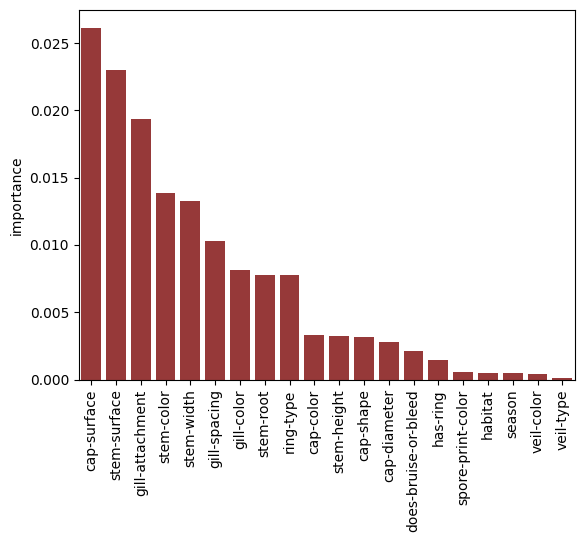

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.barplot(
    x = df_importance.index,
    y = 'importance',
    data = df_importance,
    color = 'brown')
plot = plt.setp(plot.get_xticklabels(), rotation=90)

# Make a submission

In [11]:
y_pred = predictor.predict(test_data)
y_pred[:5]

Loading: AutogluonModels/ag-20240826_063120/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/ExtraTreesGini_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBMLarge_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/RandomForestEntr_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/RandomForestGini_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/XGBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20240826_063120/models/WeightedEnsemble_L3/model.pkl


0    e
1    p
2    p
3    p
4    e
Name: class, dtype: object

In [12]:
sub['class'] = y_pred
sub.head()    

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


In [13]:
sub.to_csv('Autogluon_solution.csv',index=False)
print("Your submission was successfully saved")

Your submission was successfully saved
